In [59]:
# Import packages
import plotnine as p9
import numpy as np
import statistics
from scipy import stats
from scipy.stats import chi2_contingency
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
from sklearn import linear_model
#from smf import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
#%matlpotlib inline

In [60]:
#import the file
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [61]:
#print first 100 records
df.head(100)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,W877056,728fccac-151c-4743-8c4a-ebf5af17ec9d,2d0a8b770314914a21b0714fefb68925,Dallas,TX,Dallas,75212,32.78137,-96.87917,...,245.145743,1158.913690,5,5,4,5,1,5,5,4
96,97,M478246,fb749668-dbf8-448a-bc59-5bdba08f7e0b,e04663ac6cc68fac084cd2b394ca7cb8,Claytonville,IL,Iroquois,60926,40.57234,-87.80962,...,124.978080,529.407330,4,4,4,3,2,4,3,4
97,98,N417817,832e769e-3b90-47cc-8f70-12e77fbd52a2,4886325be93630732220fb84b427c7cd,Beaverville,IL,Iroquois,60912,40.97003,-87.59935,...,187.484705,1956.733700,3,2,2,4,3,2,3,2
98,99,R180138,7def992e-acd6-4b3e-9d01-68812f5fd2ff,9f2b4718c758e51e0b16b99cc7915687,Fayetteville,NC,Cumberland,28301,35.07431,-78.88358,...,162.500692,2056.386979,5,4,4,3,4,4,5,5


In [62]:
#check for columns with missing values
missingvalues = df.isna().sum()
#print the summary of columns with missing values
print(missingvalues)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [63]:
#drop columns irrelevant to analysis
NewDf = df.drop(columns=['Marital','Job','CaseOrder', 'Customer_id', 'Interaction','UID','City','State','County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Techie','Tablet',
                         'TechSupport','Contract', 'PaperlessBilling', 'PaymentMethod','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6','InternetService', 'Item7', 'Item8','Children',
                         'Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year'])

In [64]:
#check new dataset
NewDf.head()

,Gender,Churn,Port_modem,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Tenure
0,Male,No,Yes,Yes,No,Yes,Yes,No,No,Yes,6.795513
1,Female,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,1.156681
2,Female,No,Yes,Yes,Yes,No,No,No,No,Yes,15.754144
3,Male,No,No,Yes,No,Yes,No,No,Yes,No,17.087227
4,Male,Yes,Yes,No,No,No,No,No,Yes,No,1.670972


In [65]:
#check the datatypes of each columns
NewDf.dtypes

Gender               object
Churn                object
Port_modem           object
Phone                object
Multiple             object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
StreamingTV          object
StreamingMovies      object
Tenure              float64
dtype: object

In [66]:
#create dummies for certain variables
NewDf['Gender_d'] = [1 if v == 'Female' else 0 for v in NewDf['Gender']]
NewDf['Churn_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Churn']]
NewDf['PortModem_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Port_modem']]
NewDf['Phone_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Phone']]
NewDf['Multiple_d'] = [1 if v == 'Yes' else 0 for v in NewDf['Multiple']]
NewDf['OnlineSecurity_d'] = [1 if v == 'Yes' else 0 for v in NewDf['OnlineSecurity']]
NewDf['OnlineBackup_d'] = [1 if v == 'Yes' else 0 for v in NewDf['OnlineBackup']]
NewDf['DeviceProtection_d'] = [1 if v == 'Yes' else 0 for v in NewDf['DeviceProtection']]
NewDf['StreamingTV_d'] = [1 if v == 'Yes' else 0 for v in NewDf['StreamingTV']]
NewDf['StreamingMovies_d'] = [1 if v == 'Yes' else 0 for v in NewDf['StreamingMovies']]

In [67]:
NewDf = NewDf.drop(columns=['Gender','Churn','Port_modem','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'])
NewDf.head()

,Tenure,Gender_d,Churn_d,PortModem_d,Phone_d,Multiple_d,OnlineSecurity_d,OnlineBackup_d,DeviceProtection_d,StreamingTV_d,StreamingMovies_d
0,6.795513,0,0,1,1,0,1,1,0,0,1
1,1.156681,1,1,0,1,1,1,0,0,1,1
2,15.754144,1,0,1,1,1,0,0,0,0,1
3,17.087227,0,0,0,1,0,1,0,0,1,0
4,1.670972,0,1,1,0,0,0,0,0,1,0


In [68]:
NewDf.to_csv ('NewDf_C.csv', index = False, header=True)
print(NewDf)

         Tenure  Gender_d  Churn_d  PortModem_d  Phone_d  Multiple_d  \
0      6.795513         0        0            1        1           0   
1      1.156681         1        1            0        1           1   
2     15.754144         1        0            1        1           1   
3     17.087227         0        0            0        1           0   
4      1.670972         0        1            1        0           0   
...         ...       ...      ...          ...      ...         ...   
9995  68.197130         0        0            1        1           1   
9996  61.040370         0        0            0        1           1   
9997  47.416890         1        0            0        1           1   
9998  71.095600         0        0            0        0           1   
9999  63.350860         0        0            1        1           1   

      OnlineSecurity_d  OnlineBackup_d  DeviceProtection_d  StreamingTV_d  \
0                    1               1                   0

In [69]:
#Create train/test split
X = NewDf[['Gender_d', 'StreamingMovies_d', 'StreamingTV_d', 'DeviceProtection_d', 'OnlineSecurity_d', 'OnlineBackup_d', 'Phone_d','Multiple_d','Tenure']]
y = NewDf['Churn_d']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

X_train.to_csv ('X_Train.csv', index = False, header=True)
y_train.to_csv ('y_Train.csv', index = False, header=True)
X_test.to_csv ('X_Test.csv', index = False, header=True)
y_test.to_csv ('y_Test.csv', index = False, header=True)




In [70]:
#Create the first KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the first model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the first model: 0.8206666666666667


[[2000  205]
 [ 333  462]]


<AxesSubplot:>

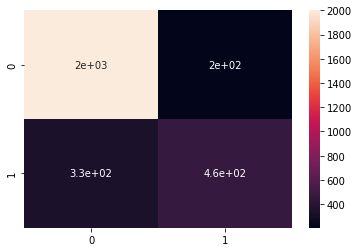

In [71]:
#Create Confusion Matrix
print(confusion_matrix(y_test, y_pred))
#create heatmap
conmat = confusion_matrix(y_test, y_pred)
sns.heatmap(conmat, annot=True)

In [72]:
#create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2205
           1       0.69      0.58      0.63       795

    accuracy                           0.82      3000
   macro avg       0.77      0.74      0.76      3000
weighted avg       0.81      0.82      0.82      3000



In [73]:
#create logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

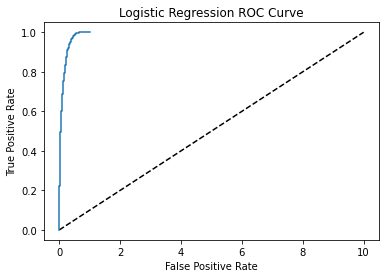

array([0.08619586, 0.05399962, 0.00498148, ..., 0.0134333 , 0.05657392,
       0.04302885])

In [74]:
#plot the ROC Curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,10],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

logreg.predict_proba(X_test)[:,1]

In [75]:
#Create Area Under the Curve (AUC)
roc_auc_score(y_test, y_pred_prob)

0.9052513584049972

Accuracy of the second model: 0.8285


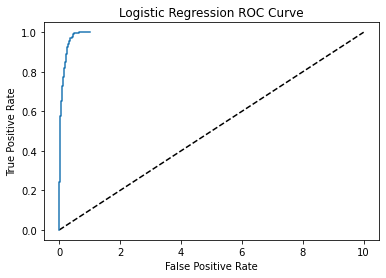

[[1370  122]
 [ 168  340]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1492
           1       0.74      0.67      0.70       508

    accuracy                           0.85      2000
   macro avg       0.81      0.79      0.80      2000
weighted avg       0.85      0.85      0.85      2000

The AUC is 0.9184443013658146


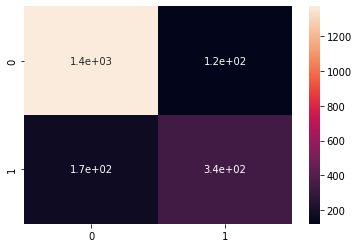

In [76]:
#Create a scaled second KNN model
steps = [('scaler', StandardScaler()),
             ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


#Create the second KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of the second model:",metrics.accuracy_score(y_test, y_pred))

#create logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#plot the ROC Curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,10],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

logreg.predict_proba(X_test)[:,1]

#Create Confusion Matrix
print(confusion_matrix(y_test, y_pred))
#create heatmap
conmat = confusion_matrix(y_test, y_pred)
sns.heatmap(conmat, annot=True)

#create classification report
print(classification_report(y_test, y_pred))

#Create new Area Under the Curve (AUC)
print("The AUC is",roc_auc_score(y_test, y_pred_prob))

